In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('Data_Nasabah.csv', delimiter=";")

print("Jumlah data (baris, kolom):", data.shape)
print("\nInformasi tipe data dan skema pengkodean:")
print(data.info())
print("\nStatistik deskriptif untuk data numerik:")
print(data.describe())
print("\nBeberapa baris pertama data:")
print(data.head())
print("\nJumlah nilai unik untuk setiap kolom:")
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")

Jumlah data (baris, kolom): (100, 10)

Informasi tipe data dan skema pengkodean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   nasabah_id                 100 non-null    object
 1   umur                       100 non-null    int64 
 2   jenis_kelamin              100 non-null    object
 3   pendapatan                 100 non-null    int64 
 4   saldo_rata_rata            100 non-null    int64 
 5   jumlah_transaksi           100 non-null    int64 
 6   jenis_produk               100 non-null    object
 7   frekuensi_kunjungi_cabang  100 non-null    int64 
 8   pengguna_mobile_banking    100 non-null    object
 9   skor_kredit                100 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 7.9+ KB
None

Statistik deskriptif untuk data numerik:
             umur    pendapatan  saldo_rata_rata  jumlah_t

In [7]:
# Melakukan pengkodean pada kolom kategorikal
data['jenis_kelamin'] = data['jenis_kelamin'].map({'Laki-Laki': 1, 'Perempuan': 2})
data['jenis_produk'] = data['jenis_produk'].map({'tabungan': 1, 'kartu_kredit': 2, 'deposito': 3})
data['pengguna_mobile_banking'] = data['pengguna_mobile_banking'].map({'YA': 1, 'TIDAK': 2})
print(data.head()) # Memastikan perubahan

  nasabah_id  umur  jenis_kelamin  pendapatan  saldo_rata_rata  \
0       N001    22              2     5800000          1508000   
1       N002    64              2     5700000          1254000   
2       N003    27              2     2950000           590000   
3       N004    34              2     3100000           186000   
4       N005    45              1     6700000          1474000   

   jumlah_transaksi  jenis_produk  frekuensi_kunjungi_cabang  \
0                19             1                          1   
1                 9             2                          2   
2                12             1                          1   
3                16             3                          5   
4                15             2                          3   

   pengguna_mobile_banking  skor_kredit  
0                        2          900  
1                        2          900  
2                        1          500  
3                        2          700  
4       

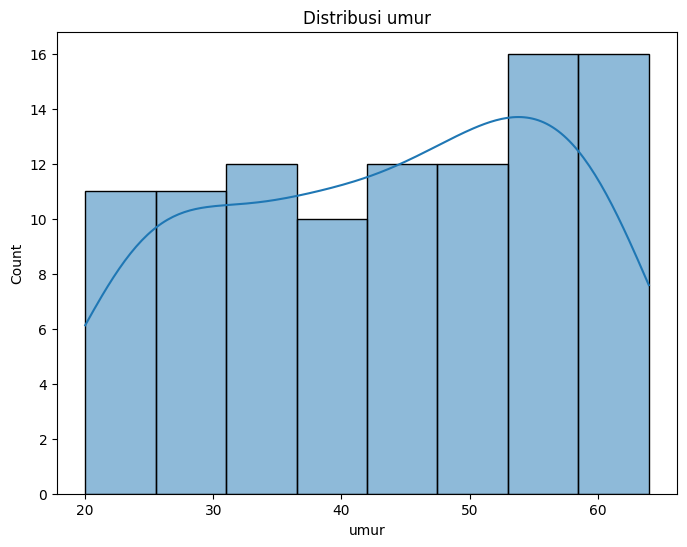

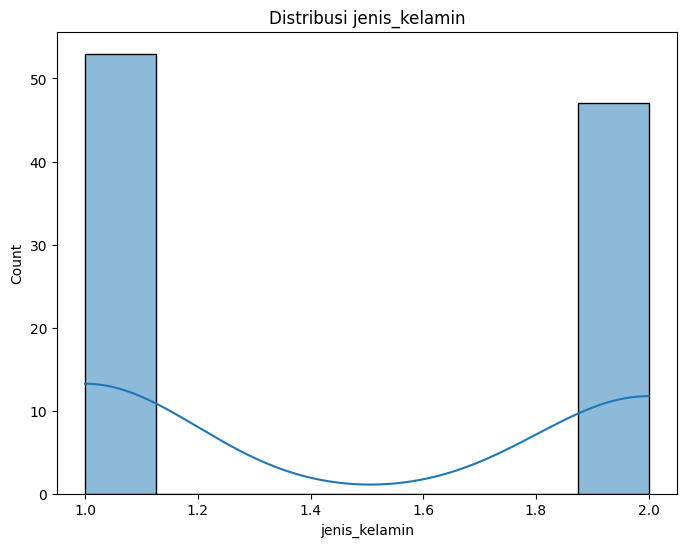

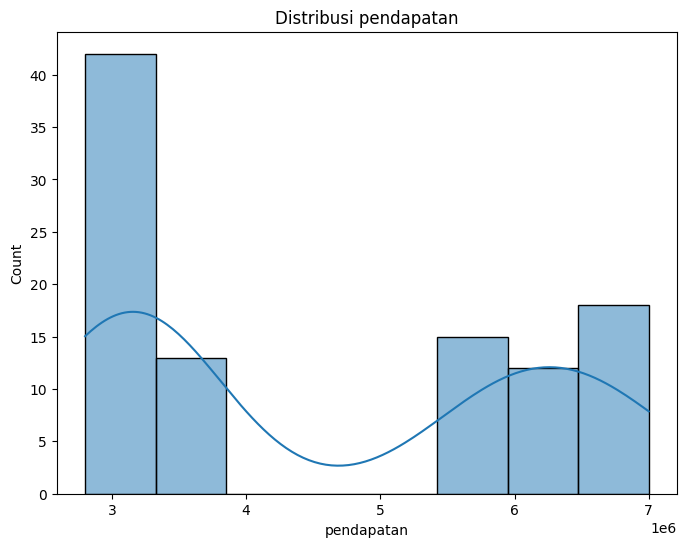

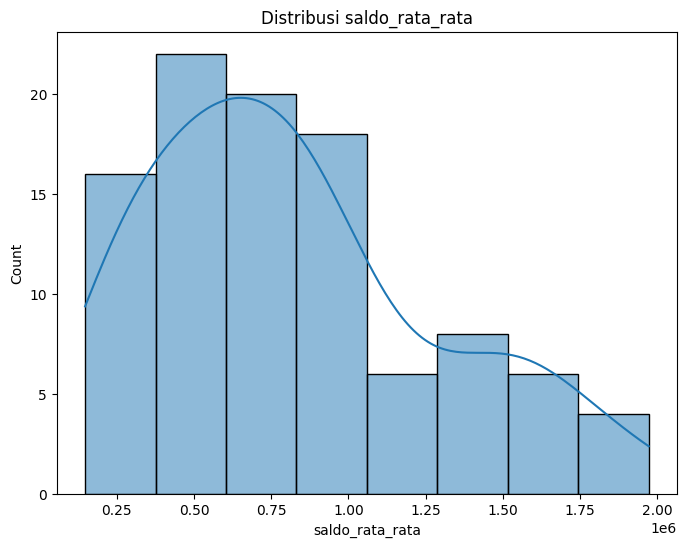

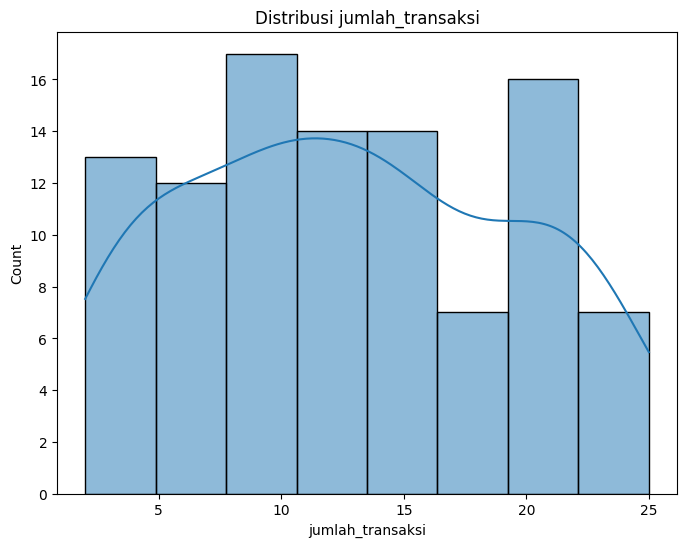

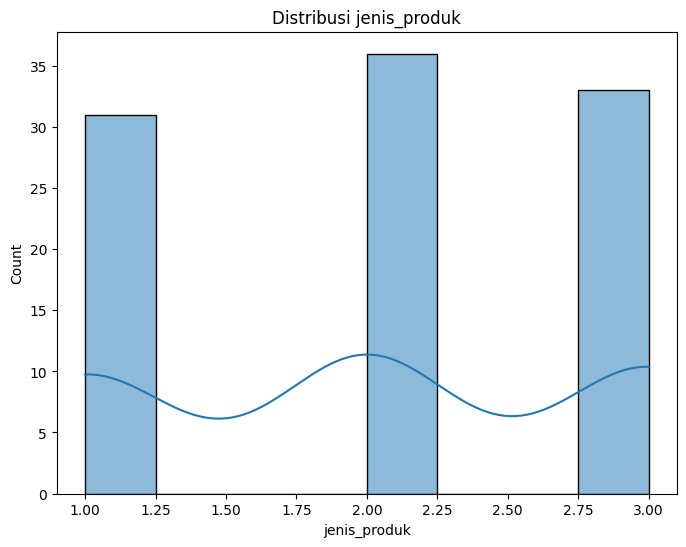

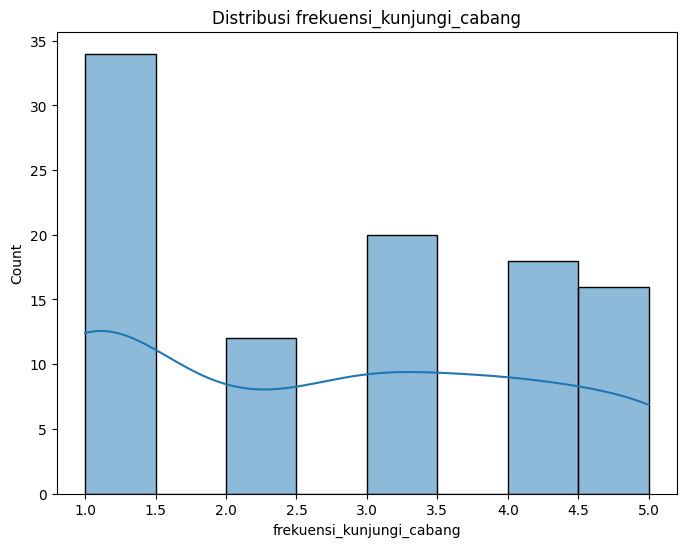

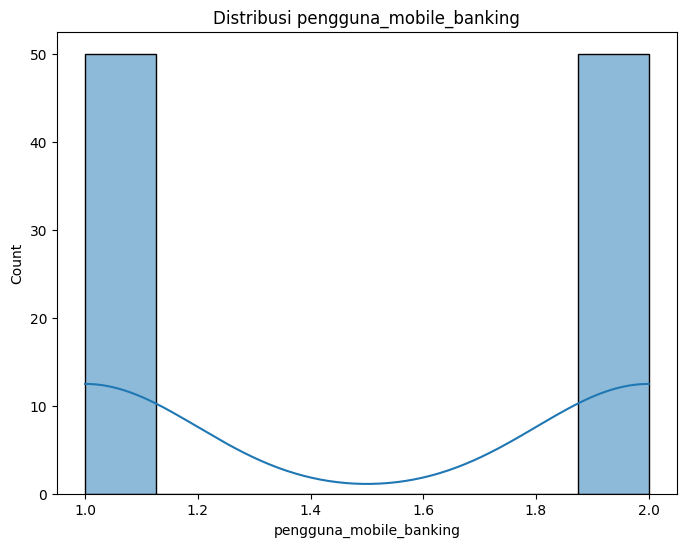

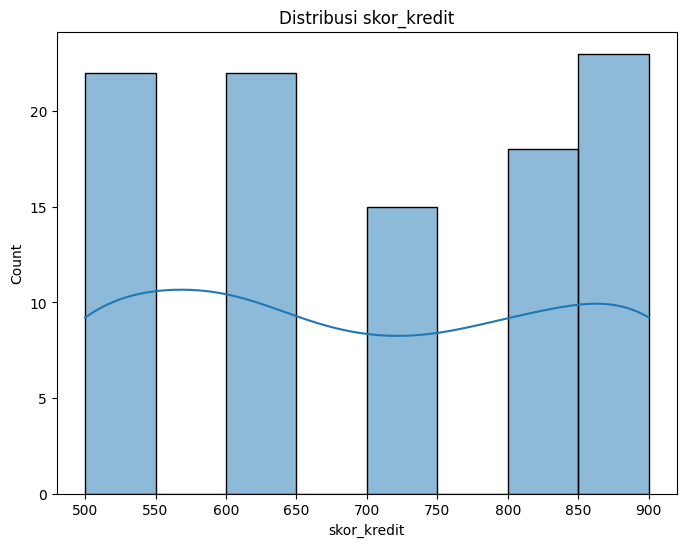

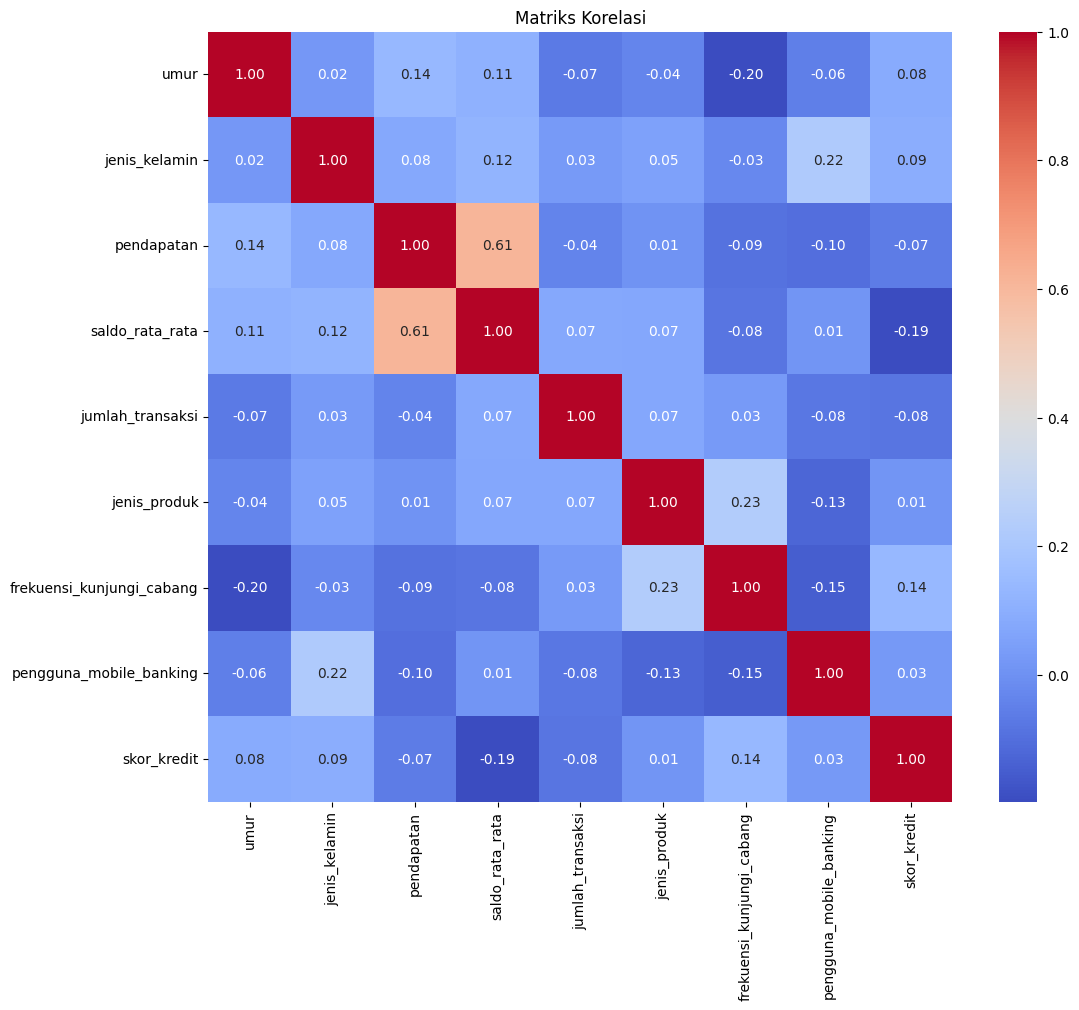

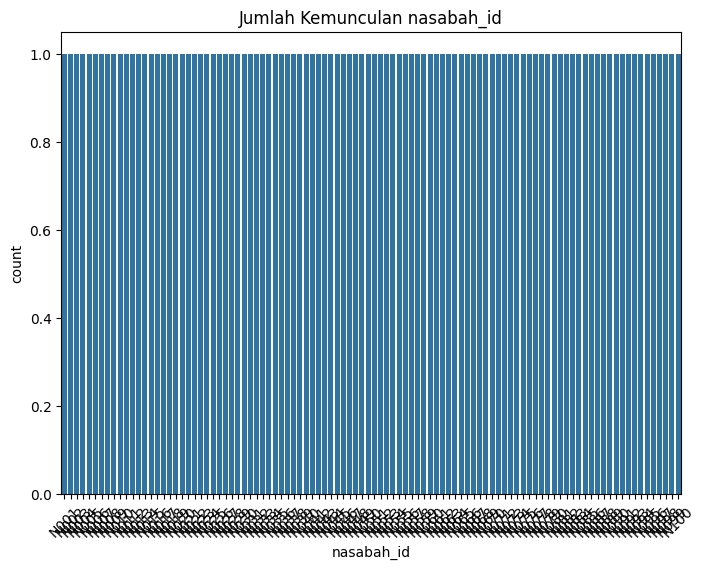


Jumlah Nilai Hilang Setiap Kolom:
nasabah_id                   0
umur                         0
jenis_kelamin                0
pendapatan                   0
saldo_rata_rata              0
jumlah_transaksi             0
jenis_produk                 0
frekuensi_kunjungi_cabang    0
pengguna_mobile_banking      0
skor_kredit                  0
dtype: int64


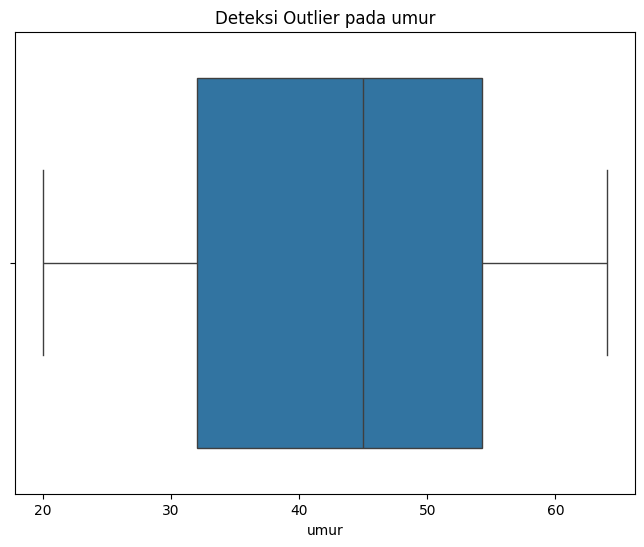

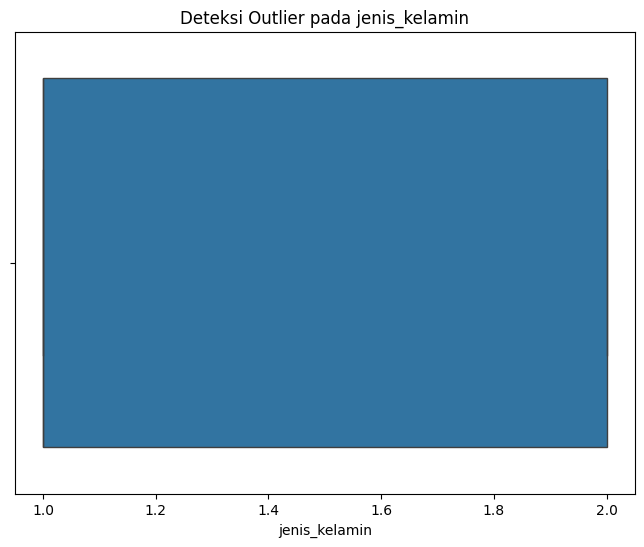

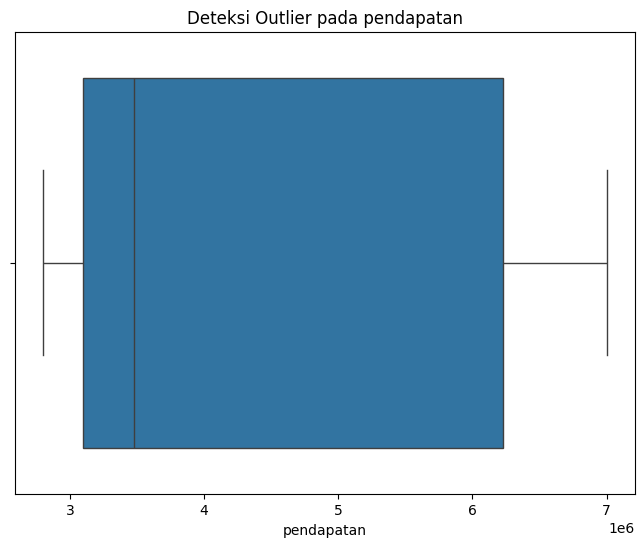

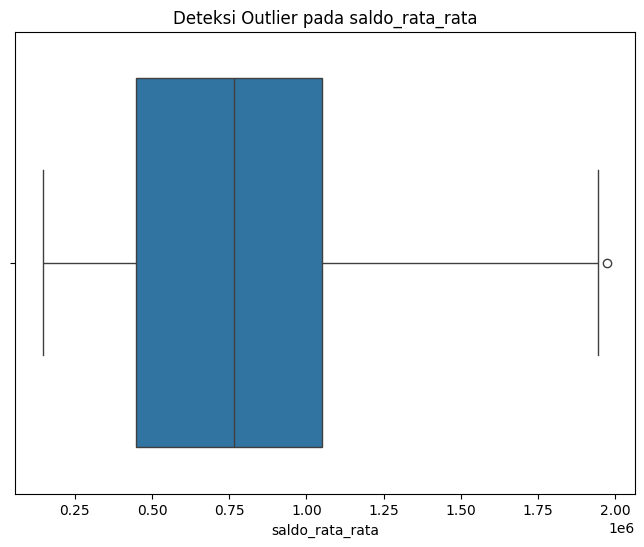

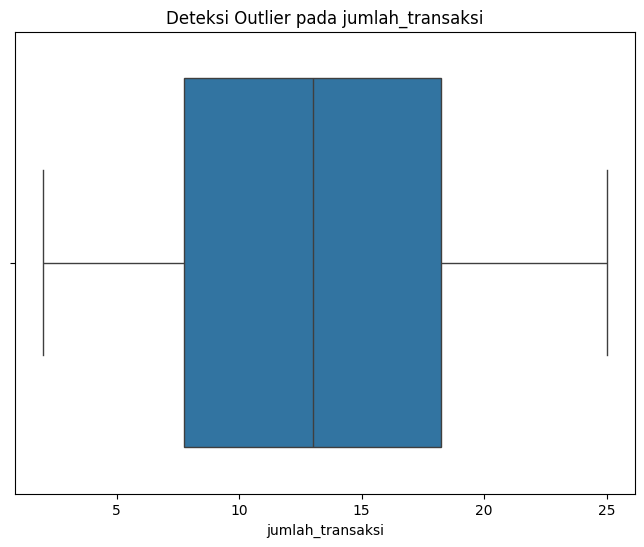

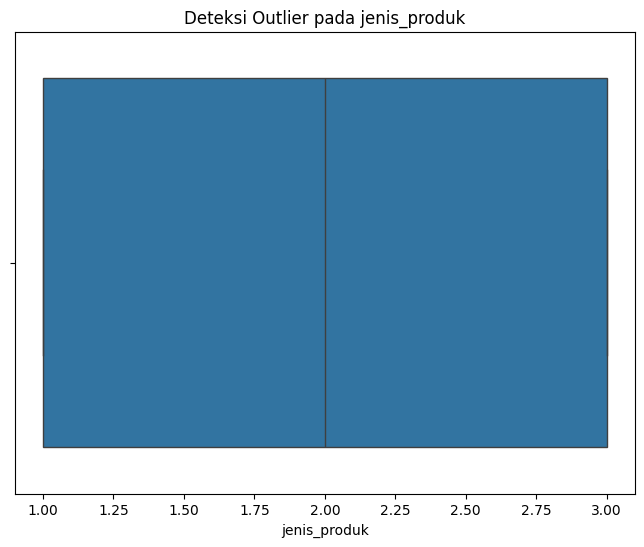

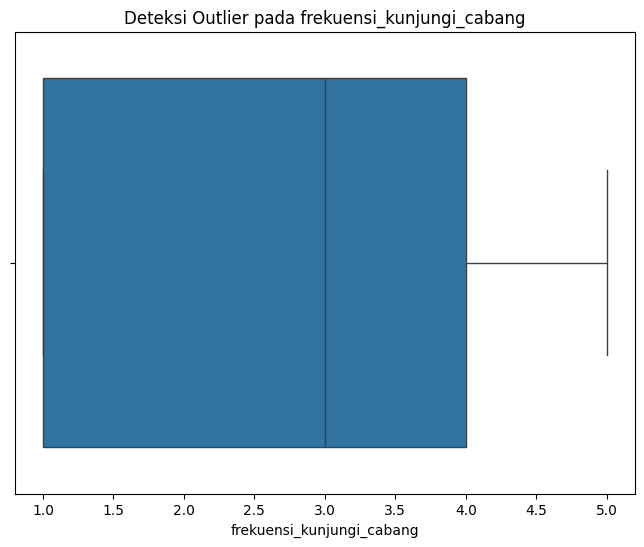

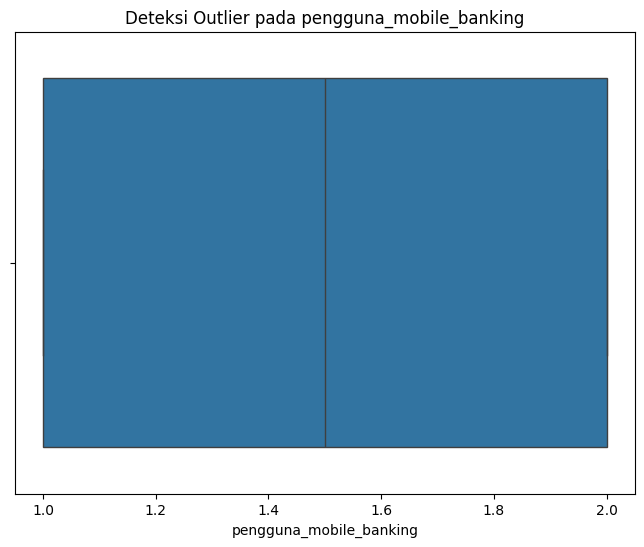

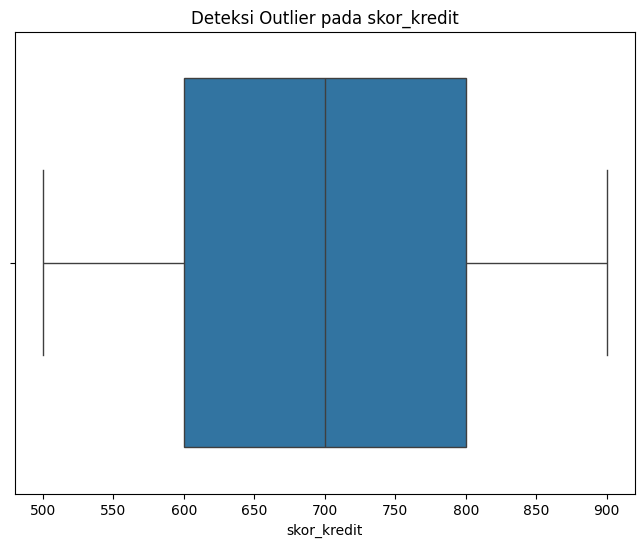

KeyError: 'Umur'

<Figure size 800x600 with 0 Axes>

In [13]:
# Analisis Distribusi Data Numerik
numerical_features = data.select_dtypes(include=['number']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribusi {feature}")
    plt.show()

# Analisis Korelasi antar Variabel
numerical_data = data.select_dtypes(include=['number'])  
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# Analisis Data Kategorikal
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f"Jumlah Kemunculan {feature}")
    plt.xticks(rotation=45)
    plt.show()

# Analisis Nilai Hilang (Missing Values)
missing_values = data.isnull().sum()
print("\nJumlah Nilai Hilang Setiap Kolom:")
print(missing_values)
# Analisis Outlier (Nilai Aneh)
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature])
    plt.title(f"Deteksi Outlier pada {feature}")
    plt.show()

# Menampilkan distribusi data untuk kolom tertentu
# (misalnya, 'Umur')
plt.figure(figsize=(8, 6))
sns.histplot(data['Umur'], kde=True)
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

# Analisis hubungan antara dua variabel (misalnya, 'Umur' dan 'Pendapatan')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Umur', y='Pendapatan', data=data)
plt.title('Hubungan antara Umur dan Pendapatan')
plt.xlabel('Umur')
plt.ylabel('Pendapatan')
plt.show()

# Menampilkan distribusi data untuk kolom 'Jenis Kelamin'
plt.figure(figsize=(6, 4))
sns.countplot(x='Jenis Kelamin', data=data)
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

# Menampilkan hubungan antara 'Jenis Kelamin' dan 'Pendapatan'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Jenis Kelamin', y='Pendapatan', data=data)
plt.title('Hubungan antara Jenis Kelamin dan Pendapatan')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Pendapatan')
plt.show()